<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_08_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8回講義 分類１
損失関数型
+ ロジスティック回帰    
+ サポートベクターマシン（SVM）


## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [ ]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       img		   Wholesale_customers_data.csv
'3(00001).txt'	 breast-cancer-wisconsin.csv   imports-85.csv	   wine.csv
'3(00002).txt'	 data			       iris.csv
'3(00003).txt'	 example.xlsx		       titanic_train.csv


# １．ロジスティック回帰

+ 自動車価格データを用いる
+ 自動車価格が10000(10K)ドル以上・以下を分類する

In [ ]:
import pandas as pd
import numpy as np

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
auto_source_df = pd.read_csv("/content/drive/MyDrive/DataScience/imports-85.csv", sep=",", header=None)
#最初の五行だけ表示
auto_source_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto_source_df.columns = ['symboling', 'normalized-losses', 'make', 'fule-type', 'aspiration', 'num-of=doors',
               'body-style', 'drive-weels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
               'curb-weight', 'engin-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
               'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

auto_source_df.head()

,symboling,normalized-losses,make,fule-type,aspiration,num-of=doors,body-style,drive-weels,engine-location,wheel-base,length,width,height,curb-weight,engin-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# 4つの列だけ抜き出す
auto_df = auto_source_df[['width', 'height', 'horsepower', 'price']]

# 不適切なデータ（？）を欠損値に置換
auto_df = auto_df.replace('?', np.nan).dropna()

#データ形式の確認
auto_df.shape

(199, 4)

In [ ]:
auto_df = auto_df.assign(price=pd.to_numeric(auto_df.price))
auto_df = auto_df.assign(horsepower=pd.to_numeric(auto_df.horsepower))

auto_df.dtypes

width         float64
height        float64
horsepower      int64
price           int64
dtype: object

In [ ]:
auto_df['price_over_10K'] = auto_df['price'].map(lambda x: 1 if x > 10000 else 0)
auto_df = auto_df[['width', 'height', 'horsepower', 'price_over_10K']]
auto_df

,width,height,horsepower,price_over_10K
0,64.1,48.8,111,1
1,64.1,48.8,111,1
2,65.5,52.4,154,1
3,66.2,54.3,102,1
4,66.4,54.3,115,1
5,66.3,53.1,110,1
6,71.4,55.7,110,1
7,71.4,55.7,110,1
8,71.4,55.9,140,1
10,64.8,54.3,101,1


In [ ]:
auto_df.groupby('price_over_10K').size()

price_over_10K
0     96
1    103
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#説明変数，目的変数の設定
X = auto_df.drop('price_over_10K', axis=1)
y = auto_df['price_over_10K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# ロジスティック回帰のモデル（インスタンス）生成
lr = LogisticRegression()
#トレーニングデータによる学習
lr.fit(X_train, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(lr.score(X_train, y_train)))
print('正解率（test):  {:.4f}'.format(lr.score(X_test, y_test)))

正解率（train):  0.8849
正解率（test):  0.8167


In [ ]:
help( LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [ ]:
#各クラスに所属する確率表示
lr.predict_proba(X_test)

array([[8.215e-01, 1.785e-01],
       [8.086e-01, 1.914e-01],
       [6.830e-01, 3.170e-01],
       [5.218e-01, 4.782e-01],
       [9.965e-04, 9.990e-01],
       [9.687e-01, 3.131e-02],
       [5.334e-01, 4.666e-01],
       [6.768e-01, 3.232e-01],
       [1.374e-02, 9.863e-01],
       [6.393e-01, 3.607e-01],
       [9.808e-01, 1.917e-02],
       [9.902e-01, 9.757e-03],
       [6.890e-04, 9.993e-01],
       [3.429e-01, 6.571e-01],
       [9.808e-01, 1.917e-02],
       [7.766e-01, 2.234e-01],
       [9.687e-01, 3.131e-02],
       [9.680e-01, 3.202e-02],
       [2.827e-03, 9.972e-01],
       [7.890e-01, 2.110e-01],
       [2.089e-02, 9.791e-01],
       [1.169e-04, 9.999e-01],
       [3.785e-04, 9.996e-01],
       [3.542e-02, 9.646e-01],
       [5.089e-08, 1.000e+00],
       [3.542e-02, 9.646e-01],
       [4.434e-02, 9.557e-01],
       [9.784e-01, 2.156e-02],
       [4.946e-05, 1.000e+00],
       [7.601e-01, 2.399e-01],
       [9.886e-01, 1.137e-02],
       [7.395e-04, 9.993e-01],
       [

### 演習１．他の説明変数によるロジスティック回帰

In [ ]:
# 目的変数 price_over_10K
# 説明変数を別のもの（例えば，width, length, engine-size, mpg）に変えて score を求める











### 参考：シグモイド関数表示

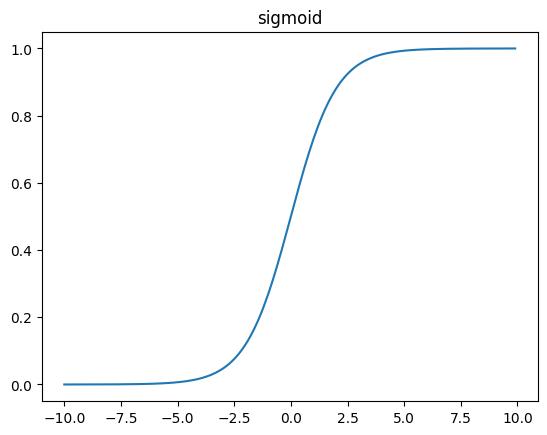

In [ ]:
#シグモイド関数表示
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(-10, 10, 0.1)
e = math.e

y = 1 / (1 + e**-x)

plt.plot(x, y)
plt.title('sigmoid')
plt.show()

# ２.SVM（サポートベクターマシン）

In [ ]:
# 通常のSVM（カーネル法）による学習と予測
from sklearn.svm import SVC

# 線形SVMのモデル（インスタンス）を生成
sv = SVC(C=10,kernel='linear', gamma=0.15,random_state=None)

#線形SVMによるトレーニングデータを用いた学習
sv.fit(X_train, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(sv.score(X_train, y_train)))
print('正解率（test):  {:.4f}'.format(sv.score(X_test, y_test)))

正解率（train):  0.8921
正解率（test):  0.8333


In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [ ]:
#線形カーネルに特化した線形SVMによる学習と予測
from sklearn.svm import LinearSVC
# 線形SVMのモデル（インスタンス）を生成
lsv = LinearSVC(C=0.1, random_state=0)

#線形SVMによるトレーニングデータを用いた学習
lsv.fit(X_train, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(lsv.score(X_train, y_train)))
print('正解率（test):  {:.4f}'.format(lsv.score(X_test, y_test)))

正解率（train):  0.7986
正解率（test):  0.8667


In [ ]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

### 演習２．標準化したデータに対してSVMを実行

In [ ]:
#標準化した後に，SVMを実行







